In [72]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Part 1 - Simulating single gambler

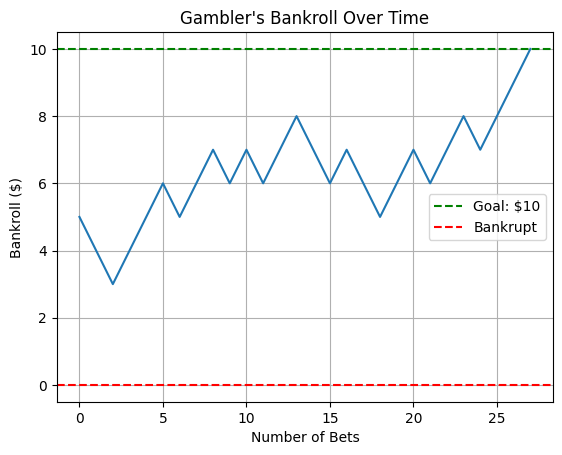

True

In [ ]:
def single_gambler(bankroll, goal, p, graph=False):
    """A single gambler walks into a casino and makes a series
       of $1 bets until they hit their goal or lose all their
       money.

    Args:
        bankroll: How much money the gambler starts with
        goal:     The winning condition for the gambler
        p:        The probability of the gambler winning each $1 bet
        graph:    If True, graphs the gambler's money over time
    Returns:
        True if the gambler meets their goal, False if they go broke

    """
    wallet = bankroll
    history = [wallet]
    
    while wallet > 0 and wallet < goal:
        if random.random() < p:
            wallet += 1
        else:
            wallet -= 1
        
        history.append(wallet)
    
    if graph:
        plt.plot(history)
        plt.axhline(y=goal, color='g', linestyle='--', label=f'Goal: ${goal}')
        plt.axhline(y=0, color='r', linestyle='--', label='Bankrupt')
        plt.title('Gambler\'s Bankroll Over Time')
        plt.xlabel('Number of Bets')
        plt.ylabel('Bankroll ($)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return wallet >= goal

single_gambler(5,10,0.51,True)

# Part 2 - Simulate many gamblers

In [ ]:
def many_gamblers( bankroll, goal, p, trials=1000 ):
    """Multiple gamblers walk into a casino and make a series
       of $1 bets until they hit their goal or lose all their
       money.

    Args:
        bankroll: How much money the gamblers start with
        goal:     The winning condition for the gamblers
        p:        The probability of winning each $1 bet
        trials:   How many gamblers we send in
    Returns:
        A ratio between 0 and 1 indicating how many gamblers were winners

    """
    numWinners = 0

    for i in range(0,trials):
        if single_gambler(bankroll, goal, p): numWinners+= 1

    return numWinners/trials

many_gamblers(5,100,0.51)

0.194

# Part 3 - Broader Investigation

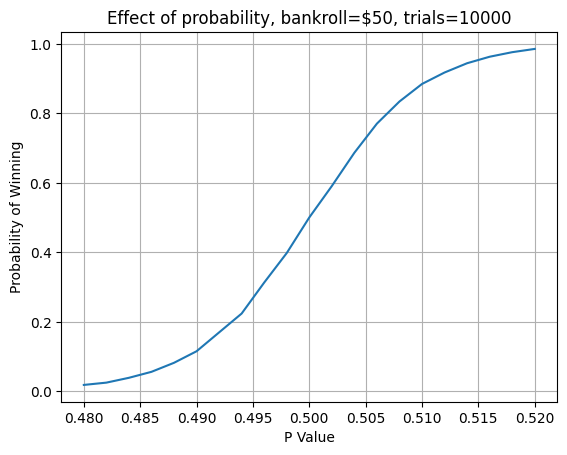

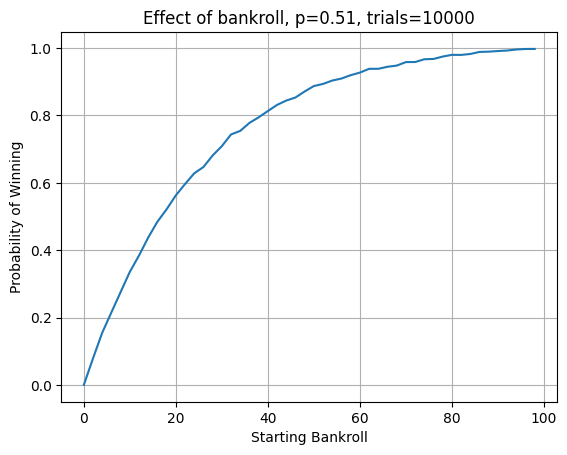

In [87]:
def visualize_p(bankroll, goal, start, stop, step, trials = 1000):
    """Varies the probability of winning each $1 bet based on start, 
       stop, and step size to produce a plot exploring changes to
       that parameter. 

    Args:
        bankroll: How much the gamblers start with        
        goal:     The winning condition for the gamblers
        start:    The smallest p to investigate
        stop:     The largest p to investigate
        step:     The stepsize for increasing p
        trials:   How many gamblers we send in for each p setting
    Returns:
        A list of tuples containing (x,y) values plotted as results

    """
    plt.figure()
    pVals = []
    winProb = []

    for i in np.arange(start,stop,step):
        winProb.append(many_gamblers(bankroll,goal,i,trials))
        pVals.append(i)
    
    plt.plot(pVals,winProb)
    plt.title(f'Effect of probability, bankroll=${bankroll}, trials={trials}')
    plt.xlabel('P Value')
    plt.ylabel('Probability of Winning')
    plt.grid(True)
    plt.show()
    


def visualize_bankroll(start, goal, step, p, trials = 1000):
    """Varies the bankroll based on start, goal, and step size to produce
       a plot exploring the effect of changing that parameter. 

    Args:
        start:  The smallest bankroll to investigate
        goal:   The winning condition for the gamblers
        step:   The stepsize for increasing the bankroll
        p:      The probability of winning each $1 bet
        trials: How many gamblers we send in for each bankroll setting
    Returns:
        A list of tuples containing (x,y) values plotted as results

    """
    plt.figure()
    bankrolls = []
    winProb = []

    for i in np.arange(start,goal,step):
        bankrolls.append(i)
        winProb.append(many_gamblers(i,goal,p,trials))
    
    plt.plot(bankrolls,winProb)
    plt.title(f'Effect of bankroll, p={p}, trials={trials}')
    plt.xlabel('Starting Bankroll')
    plt.ylabel('Probability of Winning')
    plt.grid(True)
    plt.show()


visualize_p(50,100,0.48,0.52,0.002,10000)
visualize_bankroll(0,100,2,0.51,10000)